In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, BayesianRidge, LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, f1_score, confusion_matrix, accuracy_score, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, chi2, RFECV
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier

### 1.Data Preprocessing

This section involves reading the dataset from a CSV file and handling missing values. It also includes converting relevant columns to the appropriate data types and calculating new features based on existing data.

In [ ]:
# Reading the CSV file into a DataFrame
data_frame = pd.read_csv('/content/PRECONDITION1.csv')

# Calculating the percentage of missing values for each column
null_percentage = data_frame.isnull().sum() * 100 / len(data_frame)

# Creating a DataFrame to store the percentage of missing values
missing_values_df = pd.DataFrame({'percent_missing': null_percentage})

# Converting the missing values DataFrame to LaTeX format (for use in LaTeX documents)
latex_missing_values = missing_values_df.to_latex()

# Filtering the DataFrame to include only rows where the 'result' column is 1.0
filtered_data_frame = data_frame[data_frame['result'] == 1.0]

# Displaying the original DataFrame
data_frame






,sex,entry_date,date_symptoms,intubed,pneumonia,age,diabetes,copd,asthma,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,result,icu
0,2,24-06-2020,20-06-2020,NaN,2.0,24.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,NaN
1,1,24-06-2020,18-06-2020,2.0,1.0,69.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,2.0
2,2,25-06-2020,23-06-2020,NaN,2.0,39.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1,NaN
3,1,24-06-2020,11-06-2020,2.0,1.0,79.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1,2.0
4,2,24-06-2020,19-06-2020,2.0,1.0,71.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1,13-08-2020,10-08-2020,NaN,2.0,31.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,NaN
1048571,1,13-08-2020,02-08-2020,NaN,2.0,33.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,NaN
1048572,1,13-08-2020,08-08-2020,2.0,1.0,67.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1,2.0
1048573,2,13-08-2020,04-08-2020,NaN,2.0,42.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1,NaN


In [ ]:
# Calculating the total number of missing values for each column
missing_values_count = data_frame.isnull().sum()

# Displaying the count of missing values per column
missing_values_count


sex                    0
entry_date             0
date_symptoms          0
intubed           828270
pneumonia             15
age                  125
diabetes            3216
copd                2840
asthma              2823
hypertension        2977
other_disease       4847
cardiovascular      2918
obesity             2864
renal_chronic       2861
tobacco             3039
result                 0
icu               828279
dtype: int64

In [ ]:
# Checking for missing values in the DataFrame and storing the result as a boolean DataFrame
missing_values_boolean_df = pd.isnull(data_frame)

# Checking for non-missing values in the 'icu' column and storing the result as a boolean Series
non_missing_icu_boolean_series = pd.notnull(data_frame['icu'])

# Checking for non-missing values in the 'icu' column again (redundant, same as above)
non_missing_icu_boolean_series_duplicate = pd.notnull(data_frame['icu'])

# Filtering the DataFrame to include only rows where 'icu' column is not missing, then dropping any rows with missing values
filtered_data_frame_icu = data_frame[non_missing_icu_boolean_series].dropna()

# Another way of filtering the DataFrame to include only rows where 'icu' column is not missing, then dropping any rows with missing values
filtered_data_frame_icu_duplicate = data_frame[non_missing_icu_boolean_series_duplicate].dropna()

# Displaying the filtered DataFrame
filtered_data_frame_icu


,sex,entry_date,date_symptoms,intubed,pneumonia,age,diabetes,copd,asthma,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,result,icu
1,1,24-06-2020,18-06-2020,2.0,1.0,69.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,2.0
3,1,24-06-2020,11-06-2020,2.0,1.0,79.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1,2.0
4,2,24-06-2020,19-06-2020,2.0,1.0,71.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,2.0
7,1,07-06-2020,05-06-2020,2.0,1.0,61.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,2.0
21,2,28-06-2020,27-06-2020,2.0,1.0,82.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048537,2,27-07-2020,27-07-2020,2.0,1.0,80.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1,2.0
1048540,2,01-08-2020,01-08-2020,2.0,2.0,46.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,2.0
1048541,1,03-08-2020,27-07-2020,2.0,2.0,55.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,2.0
1048550,2,19-08-2020,18-08-2020,2.0,1.0,73.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1,2.0


In [ ]:
# Converting the 'entry_date' column to datetime format
filtered_data_frame_icu['entry_date'] = pd.to_datetime(filtered_data_frame_icu['entry_date'])

# Converting the 'date_symptoms' column to datetime format
filtered_data_frame_icu['date_symptoms'] = pd.to_datetime(filtered_data_frame_icu['date_symptoms'])

# Calculating the difference between 'date_symptoms' and 'entry_date' and creating a new column 'gap_of_date'
filtered_data_frame_icu['gap_of_date'] = filtered_data_frame_icu['date_symptoms'] - filtered_data_frame_icu['entry_date']

# Taking the absolute value of the 'gap_of_date' column, converting it to an integer type
filtered_data_frame_icu['gap_of_date'] = filtered_data_frame_icu['gap_of_date'].abs().astype(int)

# Converting the 'gap_of_date' from nanoseconds to days
filtered_data_frame_icu['gap_of_date'] = filtered_data_frame_icu['gap_of_date'] / 86400000000000

# Displaying the updated DataFrame
filtered_data_frame_icu


In [ ]:
# Selecting specific columns from the filtered DataFrame
selected_columns_df = filtered_data_frame_icu[['sex', 'entry_date', 'date_symptoms', 'pneumonia', 'age',
                                               'diabetes', 'copd', 'asthma', 'hypertension', 'other_disease',
                                               'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'result',
                                               'gap_of_date', 'intubed', 'icu']]

# Displaying the DataFrame with selected columns
selected_columns_df


,sex,entry_date,date_symptoms,pneumonia,age,diabetes,copd,asthma,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,result,gap_of_date,intubed,icu
1,1,2020-06-24,2020-06-18,1.0,69.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,6.0,2.0,2.0
3,1,2020-06-24,2020-11-06,1.0,79.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1,135.0,2.0,2.0
4,2,2020-06-24,2020-06-19,1.0,71.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,5.0,2.0,2.0
7,1,2020-07-06,2020-05-06,1.0,61.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,61.0,2.0,2.0
21,2,2020-06-28,2020-06-27,1.0,82.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048537,2,2020-07-27,2020-07-27,1.0,80.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1,0.0,2.0,2.0
1048540,2,2020-01-08,2020-01-08,2.0,46.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,0.0,2.0,2.0
1048541,1,2020-03-08,2020-07-27,2.0,55.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,141.0,2.0,2.0
1048550,2,2020-08-19,2020-08-18,1.0,73.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1,1.0,2.0,2.0


In [ ]:
# Dropping the 'entry_date' column from the DataFrame
selected_columns_df.drop('entry_date', axis='columns', inplace=True)

# Dropping the 'date_symptoms' column from the DataFrame
selected_columns_df.drop('date_symptoms', axis='columns', inplace=True)

# Displaying the updated DataFrame
selected_columns_df


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,sex,pneumonia,age,diabetes,copd,asthma,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,result,gap_of_date,intubed,icu
1,1,1.0,69.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,6.0,2.0,2.0
3,1,1.0,79.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1,135.0,2.0,2.0
4,2,1.0,71.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,5.0,2.0,2.0
7,1,1.0,61.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,61.0,2.0,2.0
21,2,1.0,82.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048537,2,1.0,80.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1,0.0,2.0,2.0
1048540,2,2.0,46.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,0.0,2.0,2.0
1048541,1,2.0,55.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,141.0,2.0,2.0
1048550,2,1.0,73.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1,1.0,2.0,2.0


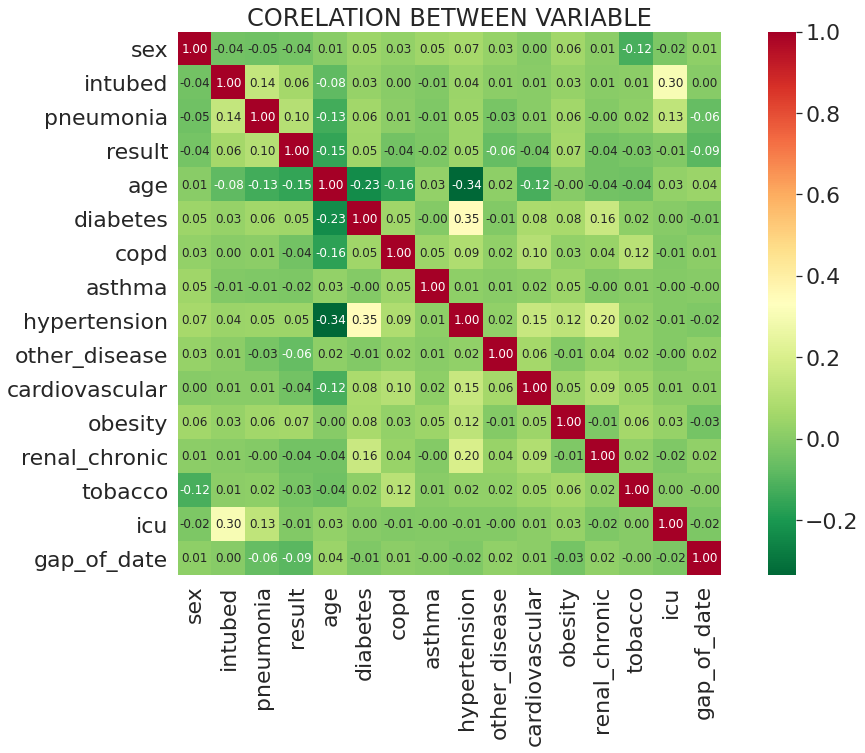

In [ ]:
# Importing additional libraries for plotting and machine learning
from pylab import rcParams
import seaborn as sns
from sklearn.neighbors import NearestNeighbors

# List of columns to be included in the correlation matrix
cols = ['sex', 'intubed', 'pneumonia', 'result', 'age', 'diabetes', 'copd', 'asthma', 'hypertension', 'other_disease',
        'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'icu', 'gap_of_date']

# Calculating the correlation matrix for the specified columns
correlation_matrix = np.corrcoef(selected_columns_df[cols].values.T)

# Setting the font scale for seaborn plots
sns.set(font_scale=2)

# Setting the figure size for the plot
rcParams['figure.figsize'] = (15, 10)

# Creating a heatmap to visualize the correlation matrix
heat_map = sns.heatmap(correlation_matrix,
                       cbar=True,
                       cmap="RdYlGn_r",
                       annot=True,
                       square=True,
                       fmt='.2f',
                       annot_kws={'size':12},
                       yticklabels=cols,
                       xticklabels=cols)

# Setting the title for the heatmap
plt.title('CORRELATION BETWEEN VARIABLES')

# Displaying the heatmap
plt.show()


### 2.Feature Selection

In this section, Recursive Feature Elimination with Cross-Validation (RFECV), Chi test and IOR are used to select the optimal subset of features for the model. This helps in improving model performance by eliminating irrelevant or redundant features.


In [ ]:
# Importing feature selection tools from sklearn
from sklearn.feature_selection import SelectKBest, chi2

# Converting the under-sampled DataFrame to a numpy array
array = under_sample.values

# Splitting the DataFrame into features (X) and target (Y)
X = under_sample.iloc[:, 0:15]  # Features: all columns except the last one
Y = under_sample.iloc[:, 15]    # Target: the last column

# Applying SelectKBest with chi-squared scoring function to select the top 14 features
test = SelectKBest(score_func=chi2, k=14)
fit = test.fit(X, Y)

# Creating a DataFrame with the scores of the features
dfscores = pd.DataFrame(fit.scores_)

# Creating a DataFrame with the feature names
dfcolumns = pd.DataFrame(X.columns)

# Concatenating the feature names and their scores into a single DataFrame
important_feature_scores = pd.concat([dfcolumns, dfscores], axis=1)

# Naming the columns of the resulting DataFrame
important_feature_scores.columns = ['Feature', 'Score']

# Sorting the DataFrame by the scores in descending order
important_feature_scores = important_feature_scores.sort_values('Score', ascending=False)

# Displaying the DataFrame with the feature scores
important_feature_scores


,feature_score_of_icu,Score
13,gap_of_date,5293.334300
14,intubed,902.904432
2,age,540.527668
1,pneumonia,384.914932
9,obesity,15.407028
0,sex,8.844840
12,result,1.362967
10,renal_chronic,0.656613
8,cardiovascular,0.468124
6,hypertension,0.349700


sex and Target


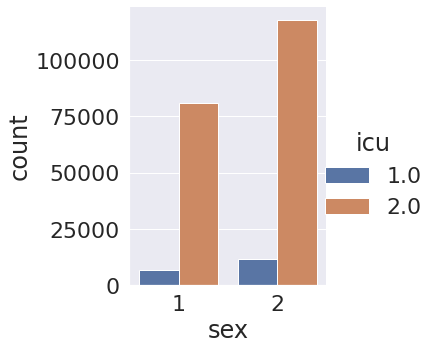

pneumonia and Target


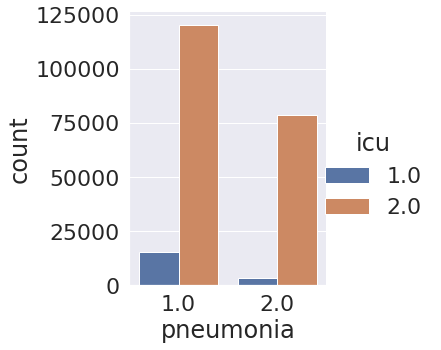

diabetes and Target


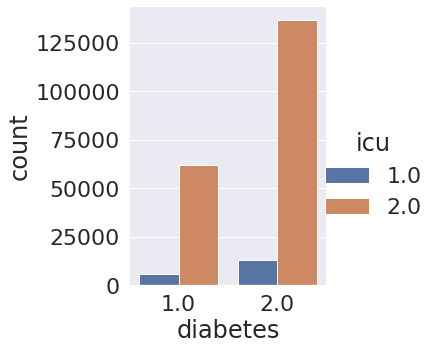

hypertension and Target


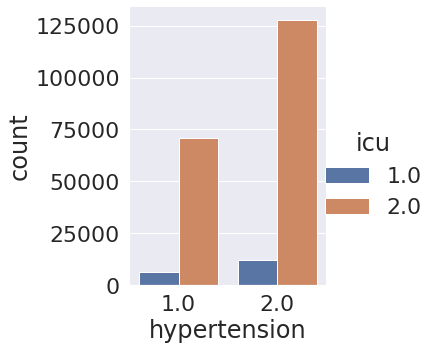

obesity and Target


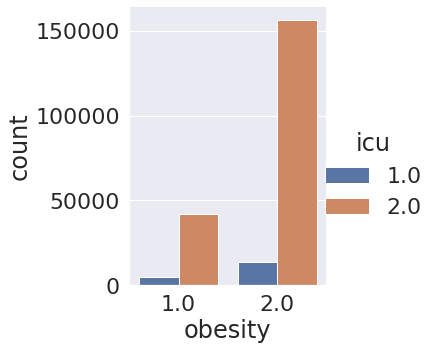

icu and Target


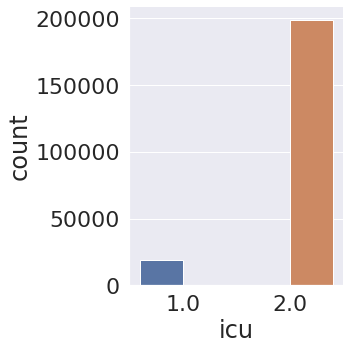

result and Target


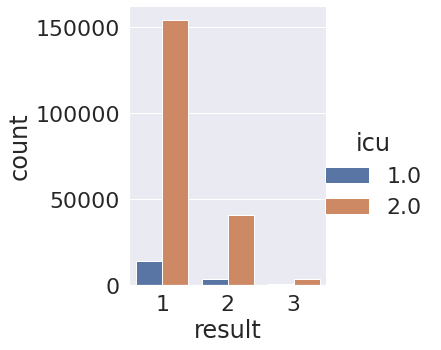

In [ ]:
# List of categorical columns to plot
categorical_columns = ['sex', 'pneumonia', 'diabetes', 'hypertension', 'obesity', 'icu', 'result']

# Loop through each categorical column and create a count plot
for column in categorical_columns:
    print(column, 'and Target')

    # Creating a count plot for each categorical column with 'icu' as the hue
    sns.catplot(x=column, hue='icu', data=selected_columns_df, kind='count')

    # Displaying the plot
    plt.show()


In [ ]:
# Selecting specific columns from the under-sampled DataFrame
selected_columns = under_sample[['sex', 'pneumonia', 'age', 'obesity', 'gap_of_date', 'intubed', 'icu']].columns

# Creating a new DataFrame with the selected columns
new_data = under_sample[selected_columns]

# Displaying the new DataFrame
new_data



In [ ]:
# Calculating the 25th percentile (Q1) for each column in the new data
Q1 = new_data.quantile(0.25)

# Calculating the 75th percentile (Q3) for each column in the new data
Q3 = new_data.quantile(0.75)

# Calculating the Interquartile Range (IQR) for each column
IQR = Q3 - Q1

# Printing the Interquartile Range (IQR) for each column
print(IQR)


intubed            0.0
age               24.0
icu                0.0
pneumonia          1.0
result             0.0
hypertension       1.0
sex                1.0
diabetes           1.0
obesity            0.0
tobacco            0.0
other_disease      0.0
renal_chronic      0.0
cardiovascular     0.0
asthma             0.0
copd               0.0
gap_of_date       90.0
dtype: float64


In [ ]:
# Calculating the cutoff value for detecting outliers
cutoff = IQR * 1.5

# Calculating the lower and upper limits for detecting outliers
lower_limit = Q1 - cutoff
upper_limit = Q3 + cutoff

# Identifying outliers in the new data
outliers = (new_data < lower_limit) | (new_data > upper_limit)

# Printing the outliers DataFrame
print(outliers)

# Identifying rows that contain any outliers
outlier_rows = outliers.apply(lambda ts: any(ts == True), axis=1)

# Displaying the rows that contain any outliers
new_data[outlier_rows]


,intubed,age,icu,pneumonia,result,hypertension,sex,diabetes,obesity,tobacco,other_disease,renal_chronic,cardiovascular,asthma,copd,gap_of_date
3,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
32,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
34,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
46,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
55,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048450,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1048453,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1048479,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1048490,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


### 3.Data Scaling

This section involves scaling the feature data to a range between 0 and 1 using the MinMaxScaler. Scaling ensures that all features contribute equally to the model training process.

In [ ]:
# Importing the necessary module for scaling
from sklearn.preprocessing import MinMaxScaler

# Creating a MinMaxScaler object to scale features between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Scaling the data using MinMaxScaler and creating a new DataFrame with the scaled data
scaled_data = pd.DataFrame(scaler.fit_transform(new_data), columns=new_data.columns)

# Displaying the scaled DataFrame
scaled_data


### 4.Splitting the Data

The dataset is split into training and testing sets. A portion of the data is used to train the model, and the remaining data is used to evaluate its performance.


In [ ]:
# Separating the target variable 'icu' and the feature variables
y = scaled_data['icu']
X = scaled_data.drop(['icu'], axis=1)

# Splitting the data into training and testing sets
# 40% of the data is used for testing, and 60% is used for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=31)




### 5.Handling Class Imbalance

This section addresses the issue of class imbalance in the dataset using the Synthetic Minority Over-sampling Technique (SMOTE). SMOTE generates synthetic samples for the minority class to create a balanced training set.

In [ ]:
# Importing the SMOTE module for oversampling
from imblearn.over_sampling import SMOTE

# Creating an instance of SMOTE with a specified random state for reproducibility
sm = SMOTE(random_state=2)

# Applying SMOTE to the training data to handle class imbalance
# The fit_sample method returns the resampled feature matrix (X_train_res) and target vector (y_train_res)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())




/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### 6.Model Training and Evaluation

This section includes the training and evaluation of various machine learning models. The models trained include K-Nearest Neighbors (KNN), Random Forest, Decision Tree, Naive Bayes, Support Vector Machine (SVM), and Logistic Regression. Each model's performance is evaluated using metrics such as accuracy, F1 score, and the confusion matrix.

#### 6.1 K-Nearest Neighbors (KNN)

A loop is used to find the optimal value of `n_neighbors` for the KNN model. The model's accuracy is evaluated for different values of `n_neighbors`.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


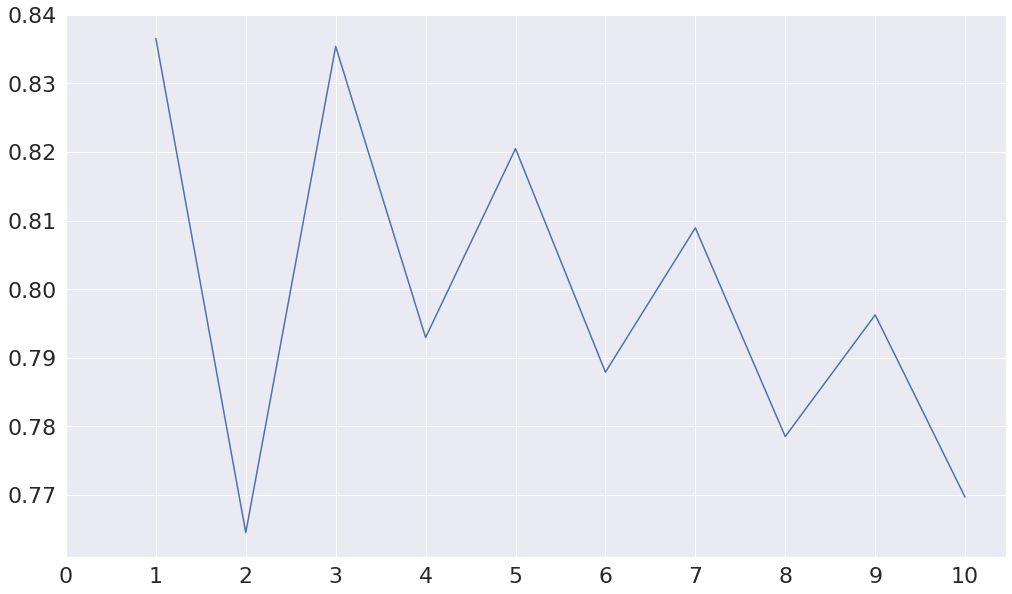

Accuracies for different values of n are: [0.83656433 0.7645165  0.83540301 0.79296309 0.82050132 0.78790387
 0.80894561 0.77852133 0.79625158 0.7696792 ]
KNearestNeighors performs best at n = 1  with a accuracy of  0.8365643325284581
F1 score : 0.5634904338690149


array([[ 1984,  8708],
       [ 5506, 70772]])

In [ ]:
# Initializing a list to store accuracy for different values of n_neighbors
acc_index = list(range(1, 11))

# Creating an empty pandas Series to store accuracy scores
acc = pd.Series(dtype=float)

# Range for x-axis in the plot
x = list(range(11))

# Looping through values of n_neighbors from 1 to 10
for i in acc_index:
    # Initializing the KNeighborsClassifier with current n_neighbors
    model = KNeighborsClassifier(n_neighbors=i)

    # Fitting the model on the resampled training data
    model.fit(X_train_res, y_train_res.ravel())

    # Predicting on the test data
    prediction = model.predict(X_test)

    # Appending the accuracy score to the Series
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, y_test)))

# Plotting the accuracy scores for different values of n_neighbors
plt.plot(acc_index, acc)
plt.xticks(x)
plt.xlabel('Number of Neighbors (n)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Neighbors')
plt.show()

# Printing the accuracies for different values of n_neighbors
print('Accuracies for different values of n are:', acc.values)

# Finding the best accuracy and the corresponding value of n_neighbors
final_acc = list(acc.values)
best_n = final_acc.index(max(final_acc)) + 1
print('KNearestNeighbors performs best at n =', best_n, 'with an accuracy of', max(final_acc))

# Training the final model with the best value of n_neighbors
model = KNeighborsClassifier(n_neighbors=best_n)
model.fit(X_train_res, y_train_res.ravel())

# Predicting on the test data with the final model
y_pred = model.predict(X_test)

# Calculating the F1 score
f1 = f1_score(y_pred, y_test, average='macro', zero_division=0)
print('F1 score:', f1)

# Displaying the confusion matrix
conf_matrix = confusion_matrix(y_pred, y_test)
print('Confusion Matrix:\n', conf_matrix)

#### 6.1.2 Random Forest Classifier

A Random Forest model is trained, and its performance is evaluated using accuracy, F1 score, and the confusion matrix.



In [ ]:
# Dictionary to store accuracy scores of different models
accuracies = {}

# Importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score

# Initializing the RandomForestClassifier with 1000 estimators and a fixed random state
rf = RandomForestClassifier(n_estimators=1000, random_state=1)

# Fitting the model on the resampled training data
rf.fit(X_train_res, y_train_res.ravel())

# Predicting on the test data
y_pred = rf.predict(X_test)

# Calculating the accuracy score
acc = rf.score(X_test, y_test) * 100

# Storing the accuracy in the accuracies dictionary
accuracies['Random Forest'] = acc

# Printing the accuracy score
print("Random Forest Algorithm Accuracy Score: {:.2f}%".format(acc))

# Calculating the F1 score
f1 = f1_score(y_pred, y_test, average='macro', zero_division=0)
print('F1 score:', f1)

# Displaying the confusion matrix
conf_matrix = confusion_matrix(y_pred, y_test)
print('Confusion Matrix:\n', conf_matrix)


Random Forest Algorithm Accuracy Score : 86.13%
F1 score : 0.5905702473405907


array([[ 2094,  6670],
       [ 5396, 72810]])

#### 6.1.3 Decision Tree Classifier

A Decision Tree model is trained, and its performance is evaluated using accuracy, F1 score, and the confusion matrix.




In [ ]:
# Importing DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Initializing the DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# Fitting the model on the resampled training data
dtc.fit(X_train_res, y_train_res.ravel())

# Predicting on the test data
y_pred = dtc.predict(X_test)

# Calculating the accuracy score
acc = dtc.score(X_test, y_test) * 100

# Storing the accuracy in the accuracies dictionary
accuracies['Decision Tree'] = acc

# Printing the accuracy score
print("Decision Tree Test Accuracy: {:.2f}%".format(acc))

# Calculating the F1 score
f1 = f1_score(y_pred, y_test, average='macro', zero_division=0)
print('F1 score:', f1)

# Displaying the confusion matrix
conf_matrix = confusion_matrix(y_pred, y_test)
print('Confusion Matrix:\n', conf_matrix)


Decision Tree Test Accuracy 86.13%
f1 score: 0.5803631430636049


array([[ 2103,  7650],
       [ 5387, 71830]])

#### 6.1.4 Naive Bayes Classifier

A Gaussian Naive Bayes model is trained, and its performance is evaluated using accuracy, F1 score, and the confusion matrix.



In [ ]:
# Importing GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, f1_score

# Initializing the Gaussian Naive Bayes classifier
nb = GaussianNB()

# Fitting the model on the resampled training data
nb.fit(X_train_res, y_train_res.ravel())

# Predicting on the test data
y_pred = nb.predict(X_test)

# Calculating the F1 score
f1 = f1_score(y_pred, y_test, average='macro', zero_division=0)

# Calculating the accuracy score
acc = nb.score(X_test, y_test) * 100

# Storing the accuracy in the accuracies dictionary
accuracies['Naive Bayes'] = acc

# Printing the accuracy score
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

# Printing the F1 score
print('F1 score:', f1)

# Displaying the confusion matrix
conf_matrix = confusion_matrix(y_pred, y_test)
print('Confusion Matrix:\n', conf_matrix)


Accuracy of Naive Bayes: 79.81%
f1 score :  0.6064358658427799


array([[ 4358, 14424],
       [ 3132, 65056]])

#### 6.1.5 Support Vector Machine (SVM)

An SVM model is trained, and its performance is evaluated using accuracy, F1 score, and the confusion matrix.

In [ ]:
# Importing SVC
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score

# Initializing the Support Vector Machine classifier with a fixed random state
svm = SVC(random_state=1)

# Fitting the model on the resampled training data
svm.fit(X_train_res, y_train_res.ravel())

# Predicting on the test data
y_pred = svm.predict(X_test)

# Calculating the F1 score
f1 = f1_score(y_pred, y_test, average='macro', zero_division=0)

# Calculating the accuracy score
acc = svm.score(X_test, y_test) * 100

# Storing the accuracy in the accuracies dictionary
accuracies['SVM'] = acc

# Printing the accuracy score
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

# Printing the F1 score
print("F1 score:", f1)

# Displaying the confusion matrix
conf_matrix = confusion_matrix(y_pred, y_test)
print('Confusion Matrix:\n', conf_matrix)


#### 6.1.7 Logistic Regression

A Logistic Regression model is trained, and its performance is evaluated using accuracy, log loss, F1 score, and the confusion matrix.

In [ ]:

# Initializing RFECV with a Logistic Regression estimator
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')

# Fitting RFECV on the training data to perform feature selection
rfecv.fit(X_train_res, y_train.values.ravel())

# Printing the optimal number of features
print("Optimal number of features: %d" % rfecv.n_features_)

# Printing the selected features
print("Selected features: %s" % list(X_train.columns[rfecv.support_]))


In [ ]:
# Ignoring warnings
warnings.simplefilter(action='ignore')

# Initializing the Logistic Regression model
lr = LogisticRegression()

# Fitting the model on the training data
lr.fit(X_train_res, y_train)

# Predicting on the test data
y_pred = lr.predict(X_test)

# Predicting probabilities for the test data
y_pred_proba = lr.predict_proba(X_test)[:, 1]

# Calculating and printing the accuracy
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {:.2f}%".format(acc))

# Calculating and printing the log loss
log_loss_value = log_loss(y_test, y_pred_proba)
print("Log Loss:", log_loss_value)

# Calculating and printing the F1 score
f = f1_score(y_test, y_pred, zero_division=1)
print('Logistic Regression F1 score:', f)

# Displaying the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

# Storing the accuracy in the accuracies dictionary (uncomment if needed)
# accuracies['Logistic Regression'] = acc


Accuracy: 0.8355639875819248
log_loss: 0.43237471925839654
Log Reg f1 score is 0.0


In [ ]:
confusion_matrix(y_test,y_pred)

array([[    0, 14301],
       [    0, 72669]])